In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [ ]:
df = pd.read_csv('/content/Metro_Interstate_Traffic_Volume.csv')
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [ ]:
df.isnull().sum()

,0
holiday,48143
temp,0
rain_1h,0
snow_1h,0
clouds_all,0
weather_main,0
weather_description,0
date_time,0
traffic_volume,0


In [ ]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [ ]:
df.drop('holiday',axis=1, inplace=True)
df.head()

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [ ]:
df.columns

Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

#Data Visualization

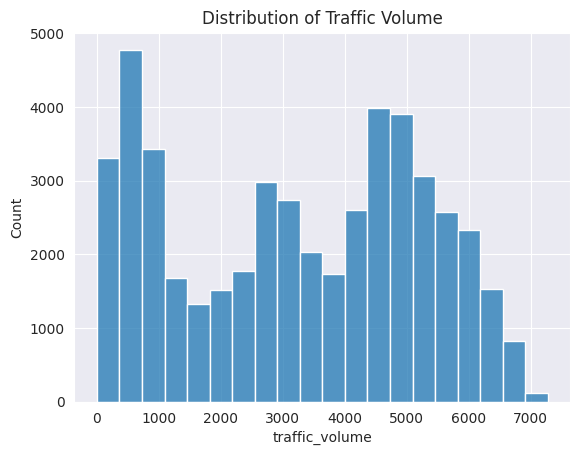

In [ ]:
sns.histplot(df['traffic_volume'], bins=20)
plt.title('Distribution of Traffic Volume')
plt.show()

# the average traffic volume

In [ ]:
df['traffic_volume'].mean()

3259.8183553232097

# correlation

In [ ]:
df[['temp', 'traffic_volume']].corr()

,temp,traffic_volume
temp,1.000000,0.130299
traffic_volume,0.130299,1.000000


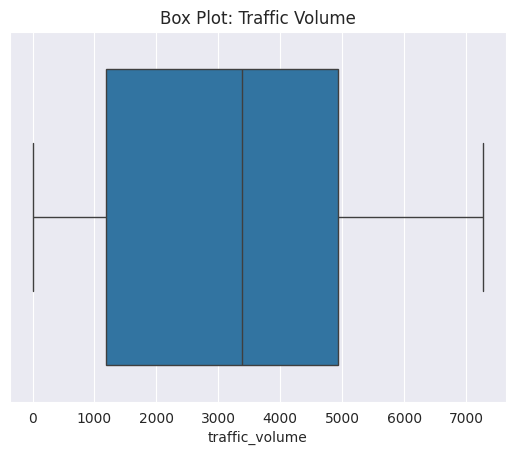

Number of Outliers: 0
Empty DataFrame
Columns: [temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description, date_time, traffic_volume]
Index: []


In [ ]:
# outliers
from scipy import stats
sns.boxplot(x=df['traffic_volume'])
plt.title('Box Plot: Traffic Volume')
plt.show()

# Identify outliers using Z-score
z_scores = np.abs(stats.zscore(df['traffic_volume']))
outliers = df[(z_scores >= 3) | (z_scores <= -3)]

# Print or analyze the outliers as needed
print(f'Number of Outliers: {len(outliers)}')
print(outliers)

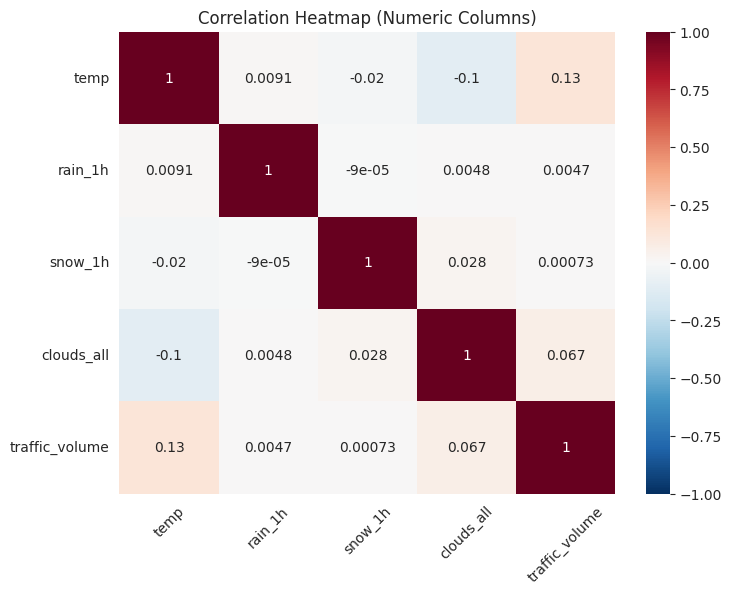

In [ ]:
# Assuming your data is in a pandas DataFrame named 'df'
# Select only the numeric columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix for the numeric columns
corr_matrix = df[num_cols].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', vmin=-1, vmax=1)
plt.title('Correlation Heatmap (Numeric Columns)')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
df.columns


Index(['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description', 'date_time', 'traffic_volume'],
      dtype='object')

In [ ]:
#df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')

In [ ]:
# تحويل التاريخ والوقت إلى مكونات زمنية
df['date_time'] = pd.to_datetime(df['date_time'])
#df['hour'] = df['date_time'].dt.hour
#df['day_of_week'] = df['date_time'].dt.dayofweek  # يتم تحويل أيام الأسبوع إلى أرقام من 0 (الاثنين) إلى 6 (الأحد)
#df['month'] = df['date_time'].dt.month

In [ ]:
# افتراض أن البيانات قد تم تحميلها في DataFrame يسمى df
# تحويل عمود date_time إلى نوع بيانات datetime
#df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')

# تصفية البيانات لإزالة الصفوف التي تحتوي على السنة التي تريد حذفها (على سبيل المثال، 2015)
#year_to_remove = 2015
#df_filtered = df[df['date_time'].dt.year != year_to_remove]

# إعادة تعيين الفهرس بعد التصفية
#df_filtered = df_filtered.reset_index(drop=True)

# عرض بعض من البيانات بعد التصفية للتأكد من أن العملية تمت بنجاح
#print(df_filtered.head())
#print(f"عدد الصفوف بعد التصفية: {len(df_filtered)}")

In [ ]:
# # Seasonal and Cyclic Trends:
# # Monthly traffic volume trend
# #plt.figure(figsize=(12, 6))
# df.groupby(pd.Grouper(key='date_time', freq='M'))['traffic_volume'].mean().plot()
# plt.title('Monthly Traffic Volume Trend')
# plt.xlabel('Month')
# plt.ylabel('Traffic Volume')
# plt.show()


<ipython-input-22-07c65dc106b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year_month'] = df_filtered['date_time'].dt.to_period('M')


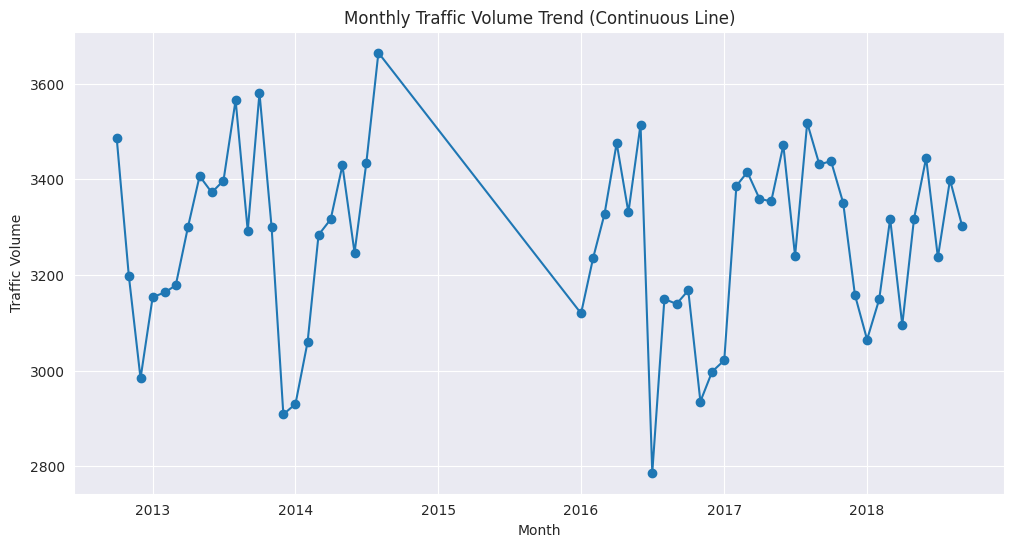

In [ ]:
# Drop rows for the year 2015
df_filtered = df[df['date_time'].dt.year != 2015]

# Group by year and month, then calculate the mean of traffic_volume
df_filtered['year_month'] = df_filtered['date_time'].dt.to_period('M')
df_grouped = df_filtered.groupby('year_month')['traffic_volume'].mean().reset_index()

# Convert 'year_month' back to a datetime format for plotting
df_grouped['year_month'] = df_grouped['year_month'].dt.to_timestamp()

# Plotting the continuous line plot
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['year_month'], df_grouped['traffic_volume'], marker='o', linestyle='-')
plt.title('Monthly Traffic Volume Trend (Continuous Line)')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.show()

In [ ]:
print(df.head())

     temp  rain_1h  snow_1h  clouds_all weather_main weather_description  \
0  288.28      0.0      0.0          40       Clouds    scattered clouds   
1  289.36      0.0      0.0          75       Clouds       broken clouds   
2  289.58      0.0      0.0          90       Clouds     overcast clouds   
3  290.13      0.0      0.0          90       Clouds     overcast clouds   
4  291.14      0.0      0.0          75       Clouds       broken clouds   

            date_time  traffic_volume  
0 2012-10-02 09:00:00            5545  
1 2012-10-02 10:00:00            4516  
2 2012-10-02 11:00:00            4767  
3 2012-10-02 12:00:00            5026  
4 2012-10-02 13:00:00            4918  


In [ ]:
# Convert the 'date_time' column to datetime format
df['date_time'] = pd.to_datetime(df['date_time'])

Split and train

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# تحديد الميزات المستقلة والمتغير التابع
features = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'weather_description','date_time']
target = 'traffic_volume'


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   temp                 48204 non-null  float64       
 1   rain_1h              48204 non-null  float64       
 2   snow_1h              48204 non-null  float64       
 3   clouds_all           48204 non-null  int64         
 4   weather_main         48204 non-null  object        
 5   weather_description  48204 non-null  object        
 6   date_time            48204 non-null  datetime64[ns]
 7   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 2.9+ MB


In [ ]:
df.sample(3)

,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
20560,248.61,0.0,0.0,75,Snow,light snow,2016-01-11 08:00:00,5494
34900,290.22,0.0,0.0,90,Mist,mist,2017-06-28 07:00:00,5320
15162,298.77,0.0,0.0,40,Rain,proximity shower rain,2014-06-27 20:00:00,3375


In [ ]:
df['weather_main'].unique()

array(['Clouds', 'Clear', 'Rain', 'Drizzle', 'Mist', 'Haze', 'Fog',
       'Thunderstorm', 'Snow', 'Squall', 'Smoke'], dtype=object)

In [ ]:
df['weather_description'].unique()

array(['scattered clouds', 'broken clouds', 'overcast clouds',
       'sky is clear', 'few clouds', 'light rain',
       'light intensity drizzle', 'mist', 'haze', 'fog',
       'proximity shower rain', 'drizzle', 'moderate rain',
       'heavy intensity rain', 'proximity thunderstorm',
       'thunderstorm with light rain', 'proximity thunderstorm with rain',
       'heavy snow', 'heavy intensity drizzle', 'snow',
       'thunderstorm with heavy rain', 'freezing rain', 'shower snow',
       'light rain and snow', 'light intensity shower rain', 'SQUALLS',
       'thunderstorm with rain', 'proximity thunderstorm with drizzle',
       'thunderstorm', 'Sky is Clear', 'very heavy rain',
       'thunderstorm with light drizzle', 'light snow',
       'thunderstorm with drizzle', 'smoke', 'shower drizzle',
       'light shower snow', 'sleet'], dtype=object)

In [ ]:
print(df.dtypes)

temp                          float64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_main                   object
weather_description            object
date_time              datetime64[ns]
traffic_volume                  int64
dtype: object


In [ ]:
# df = df.astype(str)

In [ ]:
# df['date_time'] = df['date_time'].astype(str)

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder

# categorical columns
#encoder_weathermain = ['weather_main']
#encoder_weather_description = ['weather_description']

# Fit and transform the data
encoder_weathermain = LabelEncoder()
encoder_weather_description = LabelEncoder()

df["weather_main"] = encoder_weathermain.fit_transform(df['weather_main'])
df["weather_description"] = encoder_weather_description.fit_transform(df['weather_description'])

In [ ]:
#encoder.categories_

In [ ]:
#encoded_df.toarray()

In [ ]:
# import pandas as pd
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# # Assuming your data is in a pandas DataFrame called 'df'
# categorical_cols = ['weather_main', 'weather_description']

# # Create the one-hot encoder
# encoder = ColumnTransformer(transformers=[
#     ('encoder', OneHotEncoder(), categorical_cols)
# ], remainder='passthrough')

# # Fit and transform the data
# encoded_df = encoder.fit_transform(df)

# # Convert the encoded data to a pandas DataFrame
# encoded_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names_out())

# # Combine the encoded DataFrame with the original DataFrame
# final_df = pd.concat([df, encoded_df], axis=1)

In [ ]:
from sklearn.compose import ColumnTransformer

numeric_cols = ['temp', 'rain_1h', 'snow_1h', 'clouds_all']

scaler = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), numeric_cols)
], remainder='passthrough')

encoded_df = scaler.fit_transform(df)

encoded_df = pd.DataFrame(encoded_df, columns=scaler.get_feature_names_out())

final_df = pd.concat([df, encoded_df], axis=1)

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time']).astype(int)

In [ ]:
##df.drop('date_time', axis=1, inplace=True)

In [ ]:
X = df[features].values
y = df[target].values

# تطبيع البيانات باستخدام MinMaxScaler
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

In [ ]:
# تقسيم البيانات إلى مجموعات تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [ ]:
# تحويل البيانات إلى شكل مناسب لـ RNN [عدد العينات، التسلسل الزمني، عدد الميزات]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 38563
Test set size: 9641


**Model**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [ ]:
# Define our callbacks
#checkpoints = ModelCheckpoint(filepath='My_best_weights.h5', save_best_only=True)
#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [ ]:
# بناء نموذج RNN باستخدام Keras
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(1)
])

# تجميع النموذج
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,951 (11.53 KB)

 Trainable params: 2,951 (11.53 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow import keras

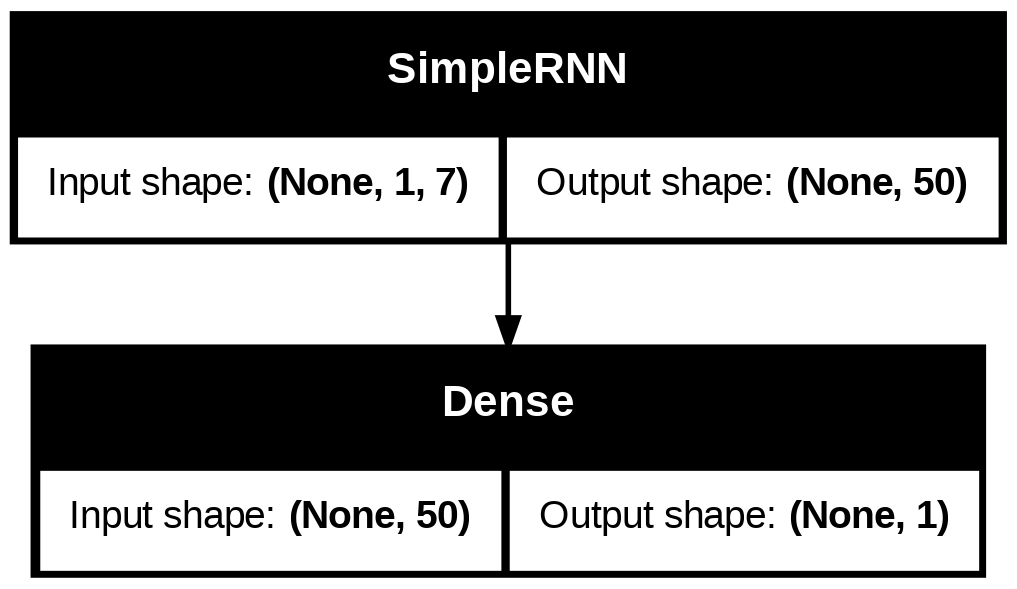

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/300
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0701 - val_loss: 0.0700
Epoch 2/300
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0699 - val_loss: 0.0699
Epoch 3/300
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0691 - val_loss: 0.0698
Epoch 4/300
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0698 - val_loss: 0.0702
Epoch 5/300
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0690 - val_loss: 0.0698
Epoch 6/300
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0699 - val_loss: 0.0700
Epoch 7/300
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0702 - val_loss: 0.0694
Epoch 8/300
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0694 - val_loss: 0.0698
Epoch 9/300
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0695 - val_loss: 0.0697
Epoch 10/300
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0695 - val_loss: 0.0695
Epoch 11/300
1206/1206 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0700 - val_loss: 0.0700
Epoch 12/300
1206/1

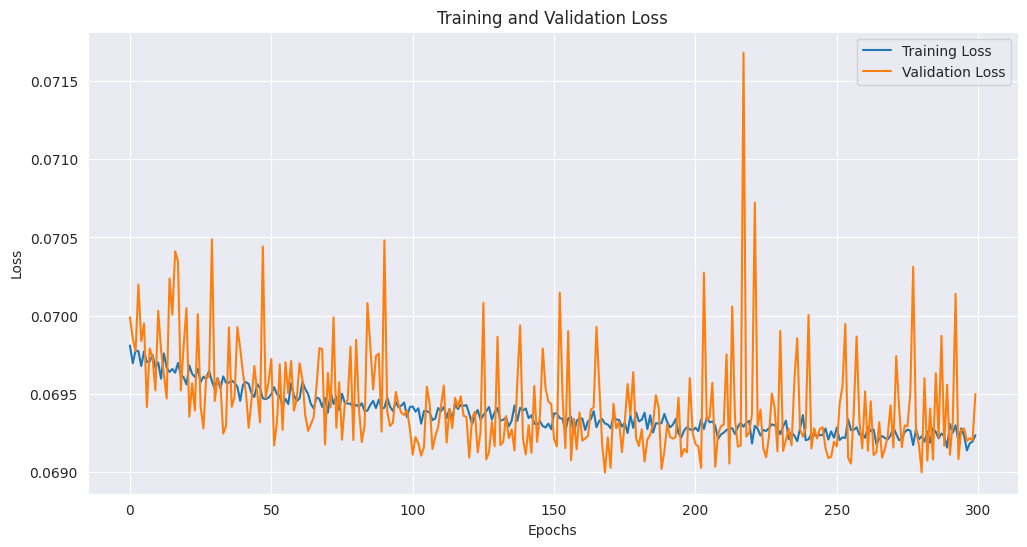

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# تقييم النموذج
loss= model.evaluate(X_test, y_test)
print(f'Loss: {loss}')

302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0694
Loss: 0.06950023770332336


In [ ]:
#make predictions
predicted_traffic_vol = model.predict(X_test)

302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Example setup
scaler_y = MinMaxScaler()

# Assuming y_test is already scaled
y_pred_scaled = model.predict(X_test)

302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
# Assume y_train and y_test are your target variables
scaler_y = MinMaxScaler()

# Fit the scaler on the training target data (y_train)
scaler_y.fit(y_train)

# After fitting the scaler, use it to inverse transform the scaled predictions
y_pred_scaled = model.predict(X_test)  # Make predictions with your model
y_pred = scaler_y.inverse_transform(y_pred_scaled)  # Inverse scaling for predictions

# Inverse scaling for actual test values
y_test_actual = scaler_y.inverse_transform(y_test)

# Print first 5 actual and predicted values
print("Actual values:", y_test_actual[:5])
print("Predicted values:", y_pred[:5])

302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Actual values: [[0.87417582]
 [0.27884615]
 [0.09725275]
 [0.27870879]
 [0.51291209]]
Predicted values: [[0.3285734 ]
 [0.40417165]
 [0.5149962 ]
 [0.39884663]
 [0.38136256]]


In [ ]:
# عكس التحجيم للقيم المتنبأ بها والقيم الحقيقية
#y_pred = scaler_y.inverse_transform(y_pred_scaled)
#y_test_actual = scaler_y.inverse_transform(y_test)

# طباعة أول 5 قيم فعلية وقيم متنبأ بها
#print(f'Actual: {y_test_actual[:5].flatten()}')
#print(f'Predicted: {y_pred[:5].flatten()}')


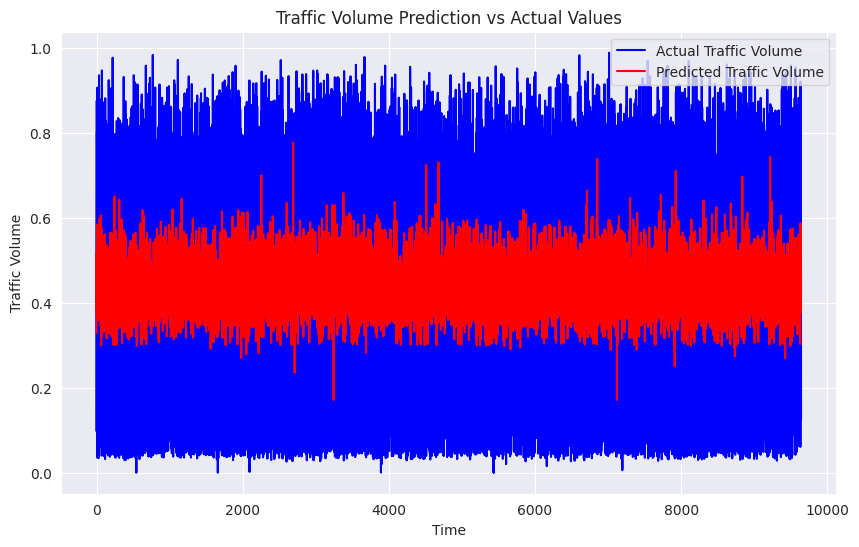

In [ ]:

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual Traffic Volume')
plt.plot(y_pred, color='red', label='Predicted Traffic Volume')
plt.title('Traffic Volume Prediction vs Actual Values')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

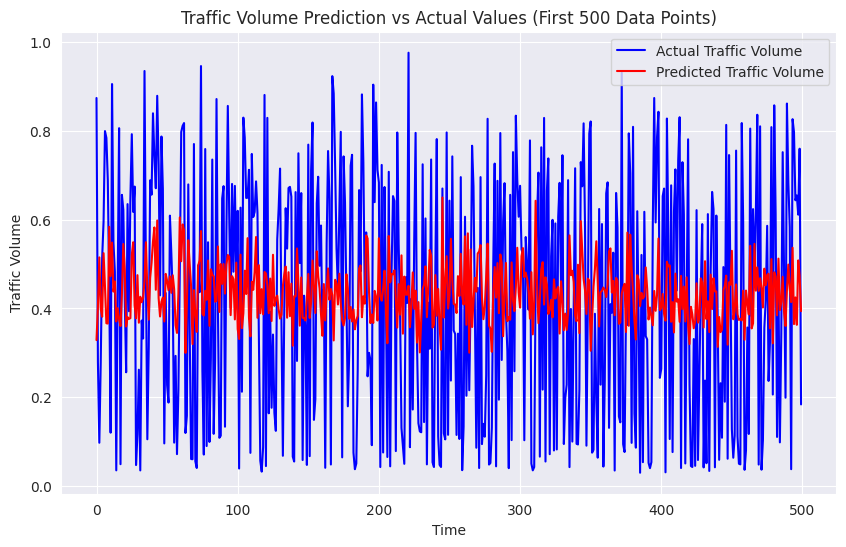

Loss (MSE) for the first 500 data points: 0.07100139285060529


In [ ]:
from sklearn.metrics import mean_squared_error

# Slicing the first 500 data points
y_test_actual_slice = y_test_actual[:500]
y_pred_slice = y_pred[:500]

# Plot the first 500 data points
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual_slice, color='blue', label='Actual Traffic Volume')
plt.plot(y_pred_slice, color='red', label='Predicted Traffic Volume')
plt.title('Traffic Volume Prediction vs Actual Values (First 500 Data Points)')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

# Calculate the loss (e.g., Mean Squared Error) for the first 500 data points
loss = mean_squared_error(y_test_actual_slice, y_pred_slice)
print("Loss (MSE) for the first 500 data points:", loss)